In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.io import loadmat
from sklearn.linear_model import LassoCV, RidgeCV, Ridge
from sklearn.model_selection import cross_val_score

In [41]:
cs = spio.loadmat('cs.mat',squeeze_me=True)['img']

In [42]:
print(cs.shape)

(50, 50)


In [43]:
#construct y

In [120]:
#source https://edstem.org/us/courses/25802/discussion/2005677?comment=4739625
n = 1300
x = cs.reshape(2500,1)
A = np.random.normal(0, 1, size=(n,2500))
n_matrix = np.random.normal(0, 5, size=(n,1))

In [121]:
y = A.dot(x)+n_matrix 

In [122]:
print(y.shape)
print(x.shape)
print(A.shape)
print(n_matrix.shape)

(1300, 1)
(2500, 1)
(1300, 2500)
(1300, 1)


In [123]:
print(x.shape)

(2500, 1)


In [124]:
lasso = LassoCV(cv=10, random_state=3)

In [125]:
lasso.fit(A,y.ravel()) #implemented ravel here based on warning message given

KeyboardInterrupt: 

In [51]:
lasso.alpha_

0.054394074988494155

In [52]:
lasso_pixels = lasso.coef_.reshape(50,50)

In [83]:
ridge = RidgeCV(cv=10)
ridge.fit(A,y.ravel())

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [62]:
ridge_pixels = ridge.coef_.reshape(50,50)

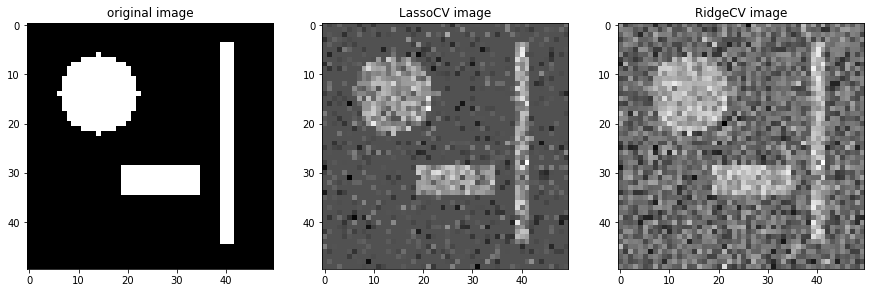

In [126]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(cs, cmap=plt.cm.gray, interpolation="nearest")
ax2.imshow(lasso_pixels, cmap=plt.cm.gray, interpolation="nearest")
ax3.imshow(ridge_pixels, cmap=plt.cm.gray, interpolation="nearest")

ax1.title.set_text('original image')
ax2.title.set_text('LassoCV image')
ax3.title.set_text('RidgeCV image')

plt.show()

In [77]:
#lasso.alphas_

In [76]:
#lasso.mse_path_

## Plot CV Alpha

### LASSO

In [86]:
#source https://edstem.org/us/courses/25802/discussion/2005677?comment=4677299

In [75]:
lasso_mse = np.mean(lasso.mse_path_,axis=1)
lasso_alphas = lasso.alphas_

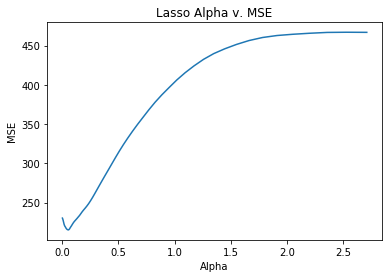

In [112]:
plt.plot(lasso_alphas,lasso_mse)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Lasso Alpha v. MSE")
plt.show()

### Ridge

In [109]:
mse = []
alphas = np.linspace(0.1,300,50)

for a in alphas:
    clf = Ridge(alpha = a)
    scores = np.mean(-cross_val_score(clf, X = A, y = y.ravel(), cv=10, scoring='neg_mean_squared_error'))
    mse.append(scores)
    

In [110]:
mse

[263.5684180270613,
 263.4330082007664,
 263.3212136861571,
 263.23131502886247,
 263.1617433278364,
 263.11106442357465,
 263.07796502258896,
 263.06124048803866,
 263.05978406857673,
 263.07257737236574,
 263.0986819222194,
 263.13723165202003,
 263.18742622481756,
 263.2485250700282,
 263.3198420514998,
 263.4007406903303,
 263.4906298766206,
 263.588960013088,
 263.6952195409332,
 263.80893180474004,
 263.92965221866496,
 264.0569657008831,
 264.19048434731656,
 264.329845319182,
 264.4747089219305,
 264.62475685579204,
 264.77969062043036,
 264.93923005821597,
 265.10311202236915,
 265.271089157758,
 265.4429287834736,
 265.6184118674855,
 265.797332084717,
 265.97949495079126,
 266.1647170245105,
 266.3528251728429,
 266.5436558928242,
 266.7370546853422,
 266.932875476275,
 267.13098008089435,
 267.33123770784084,
 267.5335244993374,
 267.7377231046156,
 267.9437222838189,
 268.1514165398951,
 268.36070577622274,
 268.57149497791784,
 268.7836939149493,
 268.9972168653638,
 269.

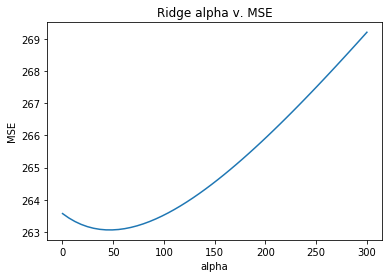

In [113]:
#figure(figsize=(8,5), dpi=100)
plt.plot(alphas, mse)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Ridge alpha v. MSE")
plt.axis("tight")
plt.show()